In [1]:
% reset -f
import torch
import sys
import torch
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy
import numpy as np
import pandas
import pandas as pd
import logging
import psutil
import os


'''
print('__Python VERSION:', sys.version)
print('__pyTorch VERSION:', torch.__version__)
print('__CUDA VERSION')
from subprocess import call
# call(["nvcc", "--version"]) does not work
! nvcc --version
print('__CUDNN VERSION:', torch.backends.cudnn.version())
print('__Number CUDA Devices:', torch.cuda.device_count())
print('__Devices')
# call(["nvidia-smi", "--format=csv", "--query-gpu=index,name,driver_version,memory.total,memory.used,memory.free"])
print('Active CUDA Device: GPU', torch.cuda.current_device())

print ('Available devices ', torch.cuda.device_count())
print ('Current cuda device ', torch.cuda.current_device())


use_cuda = torch.cuda.is_available()
FloatTensor = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if use_cuda else torch.LongTensor
Tensor = FloatTensor


handler=logging.basicConfig(level=logging.INFO)
lgr = logging.getLogger(__name__)
%matplotlib inline

# !pip install psutil

def cpuStats():
        print(sys.version)
        print(psutil.cpu_percent())
        print(psutil.virtual_memory())  # physical memory usage
        pid = os.getpid()
        py = psutil.Process(pid)
        memoryUse = py.memory_info()[0] / 2. ** 30  # memory use in GB...I think
        print('memory GB:', memoryUse)

cpuStats()'''

'\nprint(\'__Python VERSION:\', sys.version)\nprint(\'__pyTorch VERSION:\', torch.__version__)\nprint(\'__CUDA VERSION\')\nfrom subprocess import call\n# call(["nvcc", "--version"]) does not work\n! nvcc --version\nprint(\'__CUDNN VERSION:\', torch.backends.cudnn.version())\nprint(\'__Number CUDA Devices:\', torch.cuda.device_count())\nprint(\'__Devices\')\n# call(["nvidia-smi", "--format=csv", "--query-gpu=index,name,driver_version,memory.total,memory.used,memory.free"])\nprint(\'Active CUDA Device: GPU\', torch.cuda.current_device())\n\nprint (\'Available devices \', torch.cuda.device_count())\nprint (\'Current cuda device \', torch.cuda.current_device())\n\n\nuse_cuda = torch.cuda.is_available()\nFloatTensor = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor\nLongTensor = torch.cuda.LongTensor if use_cuda else torch.LongTensor\nTensor = FloatTensor\n\n\nhandler=logging.basicConfig(level=logging.INFO)\nlgr = logging.getLogger(__name__)\n%matplotlib inline\n\n# !pip install p

./output/03-01-04-02-02-01-20.wav
read!
plot
data//03-01-04-02-02-01-20
./output/03-01-07-02-02-01-09.wav
read!
plot
data//03-01-07-02-02-01-09
./output/03-01-07-02-01-02-05.wav
read!
plot
data//03-01-07-02-01-02-05
./output/03-01-03-01-02-02-05.wav
read!
plot
data//03-01-03-01-02-02-05
./output/03-01-01-01-02-01-13.wav
read!
plot
data//03-01-01-01-02-01-13
./output/03-01-04-01-01-01-17.wav
read!
plot
data//03-01-04-01-01-01-17
./output/03-01-02-02-01-02-19.wav
read!
plot
data//03-01-02-02-01-02-19
./output/03-01-06-02-01-02-08.wav
read!
plot
data//03-01-06-02-01-02-08
./output/03-01-08-02-02-02-07.wav
read!
plot
data//03-01-08-02-02-02-07
./output/03-01-07-02-02-01-03.wav
read!
plot
data//03-01-07-02-02-01-03
./output/03-01-03-01-02-01-24.wav
read!
plot
data//03-01-03-01-02-01-24
./output/03-01-02-01-01-02-05.wav
read!
plot
data//03-01-02-01-01-02-05
./output/03-01-06-01-02-01-07.wav
read!
plot
data//03-01-06-01-02-01-07
./output/03-01-06-01-02-01-21.wav
read!
plot
data//03-01-06-01-0

plot
data//03-01-04-01-01-01-21
./output/03-01-06-02-01-01-18.wav
read!
plot
data//03-01-06-02-01-01-18
./output/03-01-07-01-02-01-22.wav
read!
plot
data//03-01-07-01-02-01-22
./output/03-01-03-01-01-02-16.wav
read!
plot
data//03-01-03-01-01-02-16
./output/03-01-02-01-01-01-14.wav
read!
plot
data//03-01-02-01-01-01-14
./output/03-01-01-01-01-02-02.wav
read!
plot
data//03-01-01-01-01-02-02
./output/03-01-01-01-01-02-15.wav
read!
plot
data//03-01-01-01-01-02-15
./output/03-01-04-01-01-02-21.wav
read!
plot
data//03-01-04-01-01-02-21
./output/03-01-07-01-01-01-13.wav
read!
plot
data//03-01-07-01-01-01-13
./output/03-01-07-01-01-02-01.wav
read!
plot
data//03-01-07-01-01-02-01
./output/03-01-08-01-02-02-09.wav
read!
plot
data//03-01-08-01-02-02-09
./output/03-01-05-02-02-01-04.wav
read!
plot
data//03-01-05-02-02-01-04
./output/03-01-02-02-02-01-10.wav
read!
plot
data//03-01-02-02-02-01-10
./output/03-01-02-02-01-02-13.wav
read!
plot
data//03-01-02-02-01-02-13
./output/03-01-02-02-01-01-04.wa

TypeError: Invalid dimensions for image data

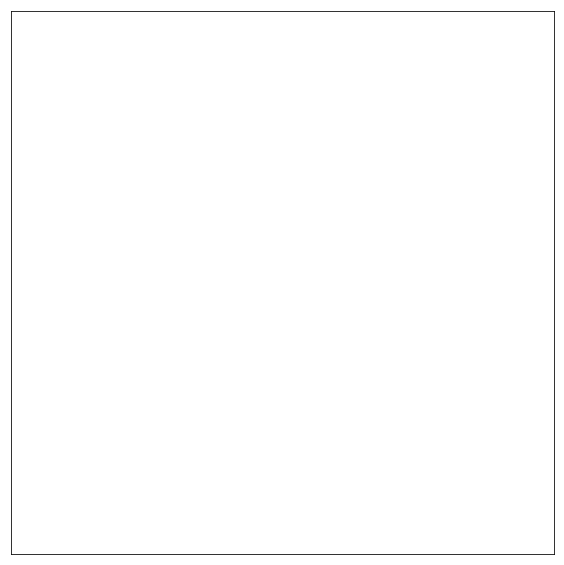

In [12]:
'''  Function: convert audio to spectogram images
'''
from scipy import signal

def wav2img(wav_path, targetdir='', figsize=(4,4)):
        #use soundfile library to read in the wave files
        sample_rate, samples = wavfile.read(wav_path)
        frequencies, times, spectogram = signal.spectrogram(samples, sample_rate)
        print('read!')

        #make the plot
        fig = plt.figure(figsize = (10,10))
        ax1 = fig.add_subplot(111)
        ax1.set_xticks([])
        ax1.set_yticks([])
        ax1.imshow(spectogram)


        #plt.show
        #plt.axis('off')
        print('plot')
        #create output path
        output_file = wav_path.split('/')[-1].split('.wav')[0]
        output_file = targetdir +'/'+ output_file
        print(output_file)
        fig.savefig('%s.png' % output_file)
        #fig.close()
        #plt.close()

#wav2img('./Audio_Speech_Actors_01-24/Actor_10/03-01-03-01-02-01-10.wav', "data/")                
'''def wav2img(wav_path, targetdir='', figsize=(4,4)):
    fs = 48000 # sampling frequency
    
    # use soundfile library to read in the wave files
    test_sound, samplerate = wavfile.read(wav_path)
    
    # make the plot
    fig = plt.figure(figsize=figsize)
    S, freqs, bins, im = plt.specgram(test_sound, NFFT=1024, Fs=samplerate)
    plt.show
    plt.axis('off')
    
    ## create output path
    output_file = wav_path.split('/')[-1].split('.wav')[0]
    output_file = targetdir +'/'+ output_file
    plt.savefig('%s.png' % output_file)
    plt.close()'''


for dirpath, dirnames, filenames in os.walk("./output/"):
    for filename in [f for f in filenames if f.endswith(".wav")]:
        print os.path.join(dirpath, filename)
        #try:
        wav2img(os.path.join(dirpath, filename), "data/")                
        #except Exception:
            #pass
